# Übung 6: Kantendetektion und Hough Transformation

### Übung von adrian.willi@stud.hslu.ch

##  Kantendetektion mit Canny

Mit dem Canny Detektor können Kanten in einem Bild detektiert werden. Das von Canny bereits 1987 etnwickelte Verfahren betrachtet die Kantenerkennung als Optimisierungsproblem und besteht in der Anwendung im wesentlichen aus 3 Schritten:

- Ermittlung der Kantenstärke durch Ableitungsfilter
- Finden des lokalen Maxima senkrecht zur Kante
- Hysteresis Thresholding mit 2 Schwellwerten unter Berücksichtigung der Verbindungen zwischen den Pixeln


In [1]:
# OpenCV needs to be included first
import cv2
import numpy as np

# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 400


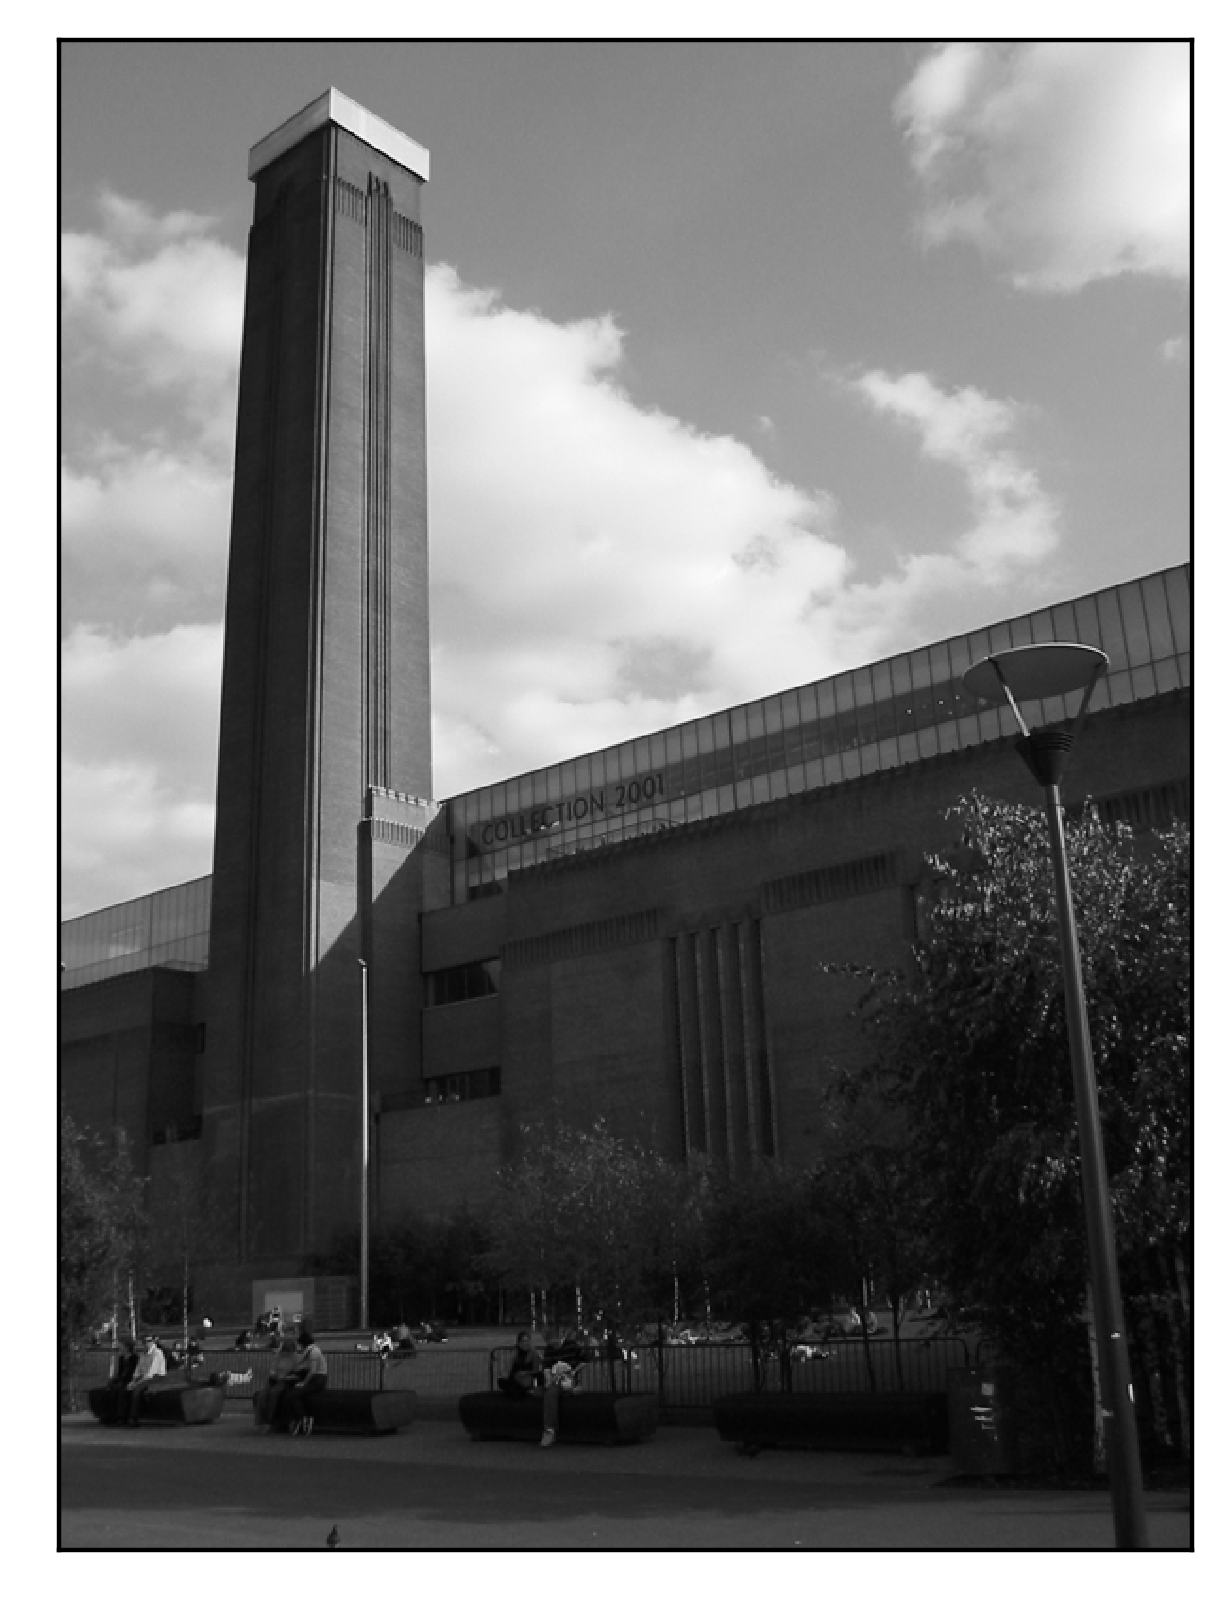

In [2]:
image  = cv2.imread('images/londonSmall.png')
plt.figure(figsize=(15,5))
plt.imshow(image), plt.xticks([]), plt.yticks([])
plt.show()

### Aufgabe 1: Kantendetektion
Detektieren Sie auf obigen Bild die Kanten mit dem in OpenCV eingebauten Canny Detektor. Wir wirken sich die Parameter aus?

### cv2.Canny(image, threshold1, threshold2)
* image: input image
* threshold1: first threshold for the hysteresis procedure
* threshold2: second threshold for the hysteresis procedure

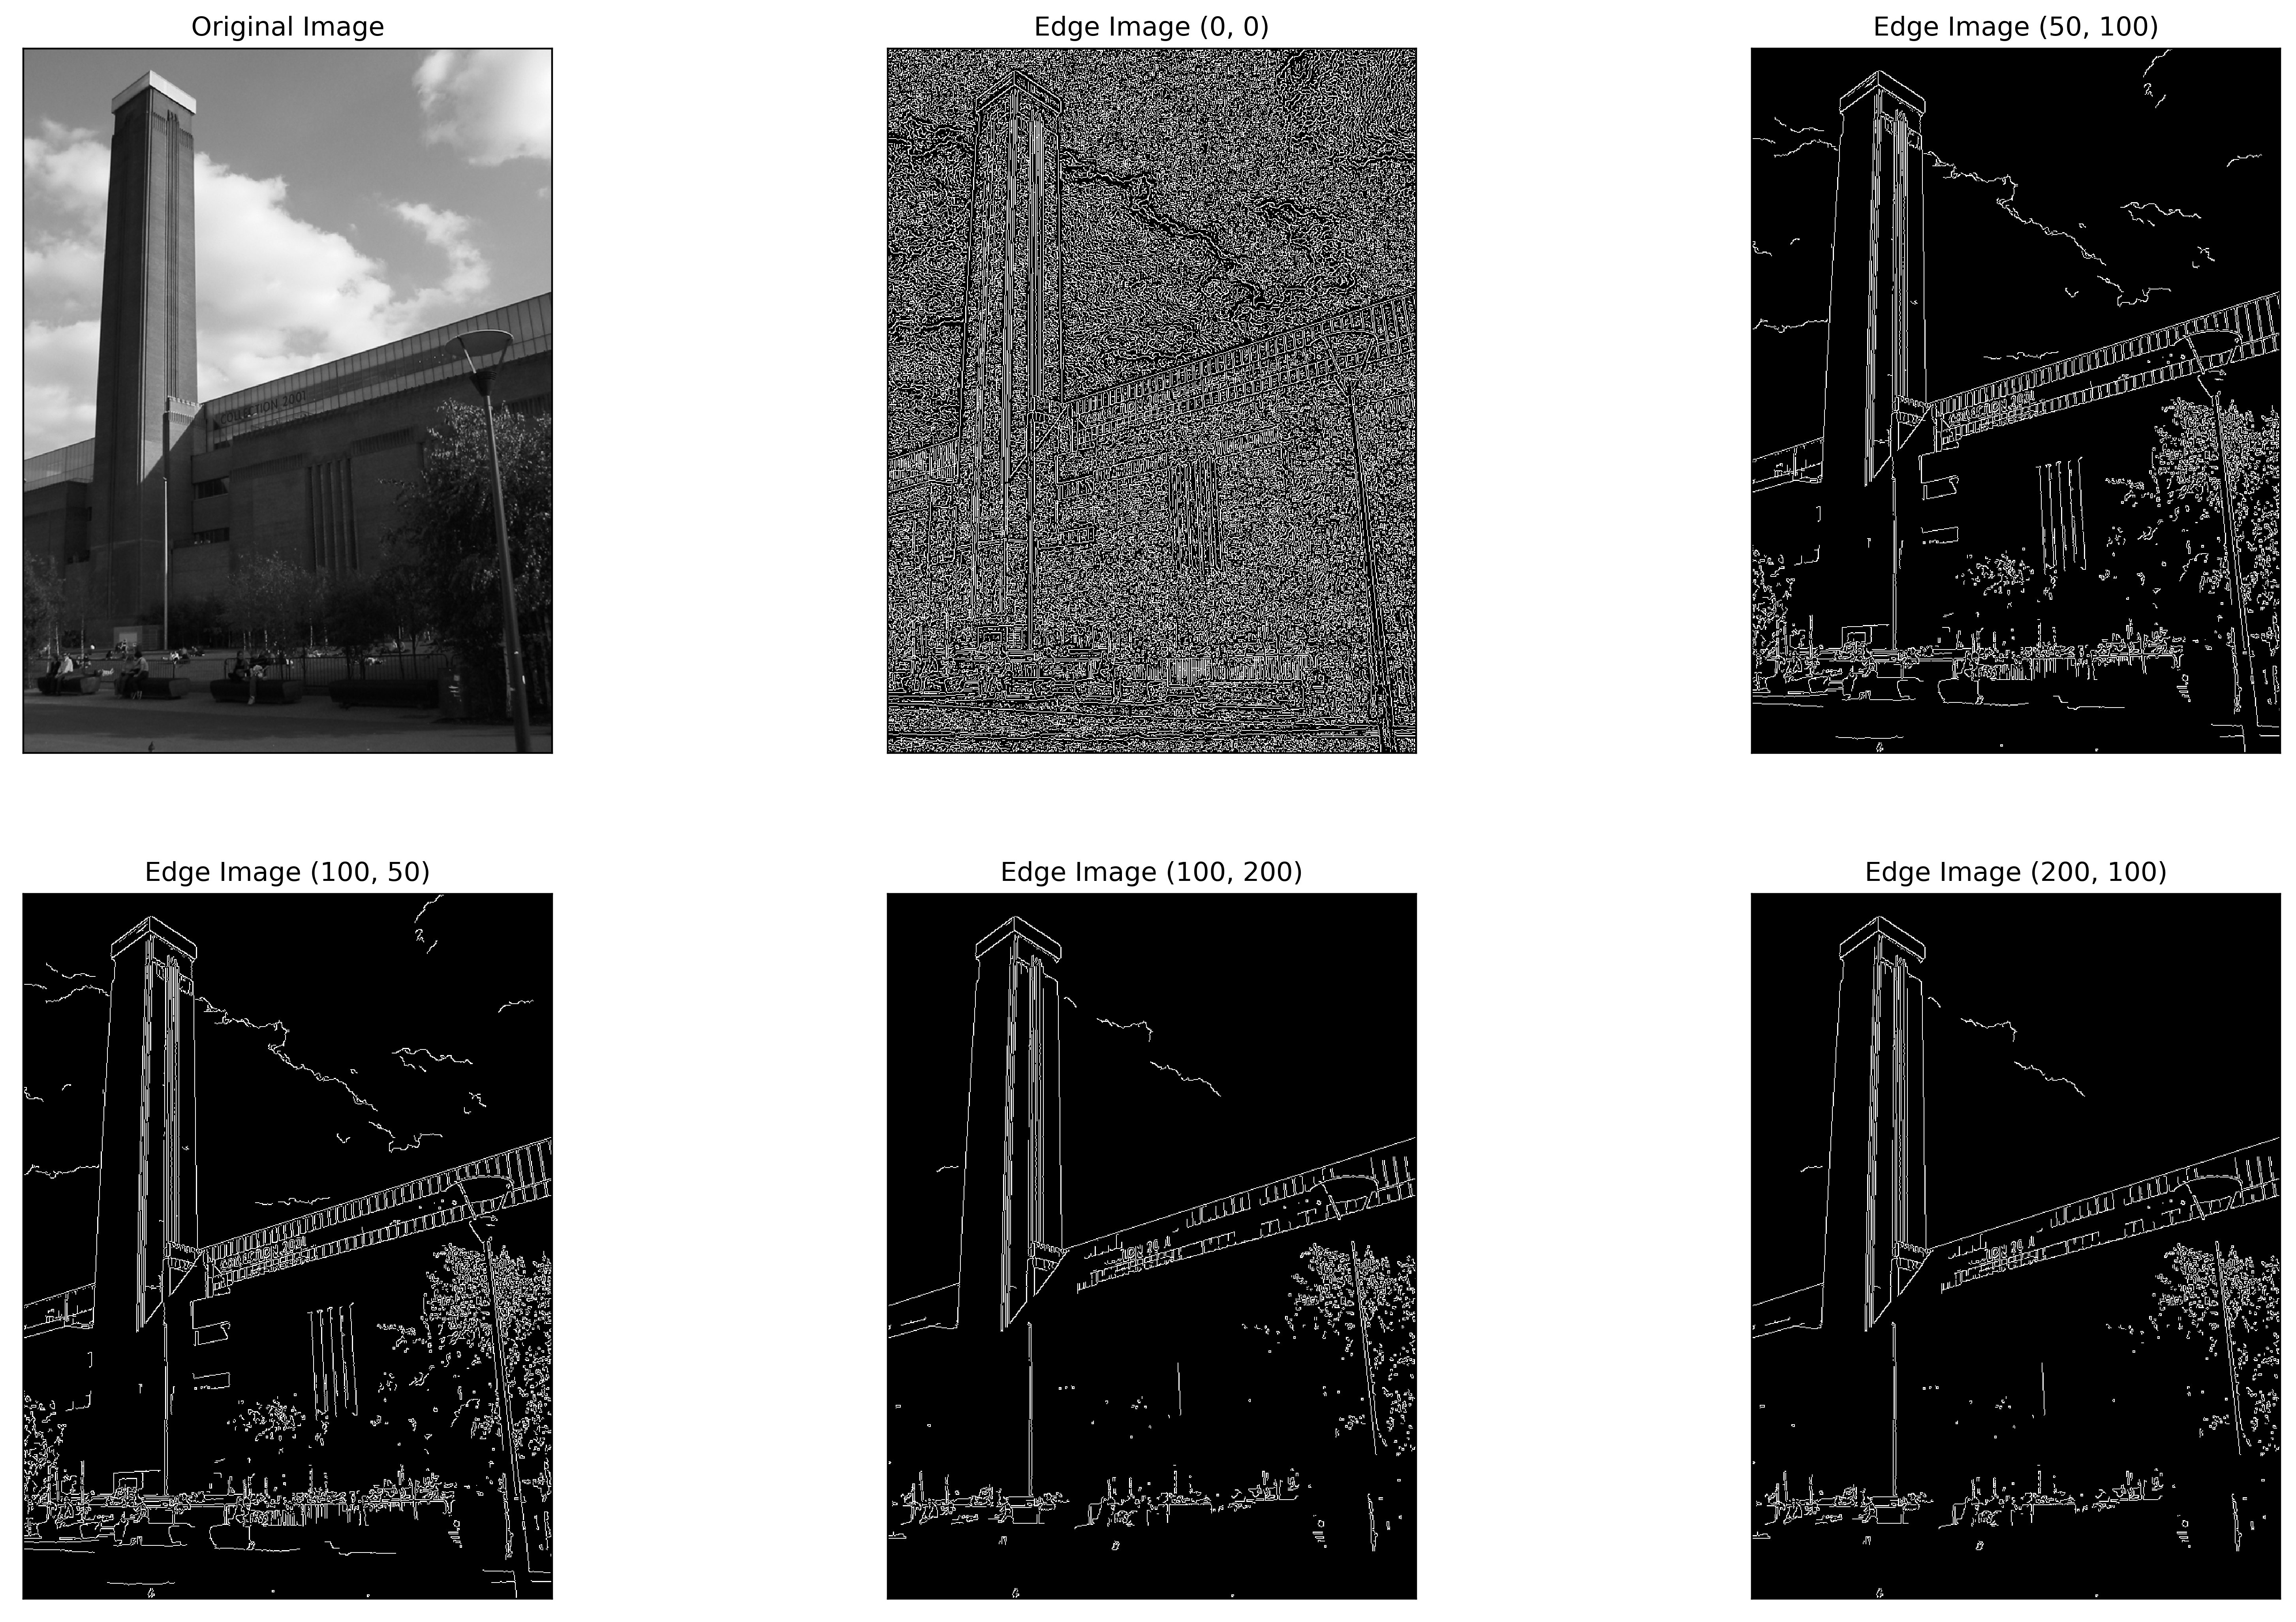

In [3]:
edges_00 = cv2.Canny(image,0,0)
edges_50100 = cv2.Canny(image,50,100)
edges_10050 = cv2.Canny(image,100,50)
edges_100200 = cv2.Canny(image,100,200)
edges_200100 = cv2.Canny(image,200,100)

plt.figure(figsize=(20, 13))
plt.subplot(231),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(edges_00,cmap = 'gray')
plt.title('Edge Image (0, 0)'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(edges_50100,cmap = 'gray')
plt.title('Edge Image (50, 100)'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(edges_10050,cmap = 'gray')
plt.title('Edge Image (100, 50)'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(edges_100200,cmap = 'gray')
plt.title('Edge Image (100, 200)'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(edges_200100,cmap = 'gray')
plt.title('Edge Image (200, 100)'), plt.xticks([]), plt.yticks([])

plt.show()

### Aufgabe2:  Canny Filter auf verschiedenen Auflösungsstufen

Der in OpenCV implementierte Canny Filter erlaubt nicht sehr viele Parameter Angaben, insbesondere ist es nicht möglich ihn direkt auf verschiedenen Auflösungsstufen anzuwenden. Dies können wir aber umgehen, indem wir die Ableitungen selber berechnen.

Dazu wollen wir zuerst das Bild mit einem Gaussfilter glätten und dann davon die ersten Ableitungen in x und y berechnen.

Benutzen Sie dazu die Funktionen GaussianBlur und dann Sobel. Am besten verwenden Sie für die Ableitungen 16bit Integer, die können dann später direkt wieder in der Canny Funktion verwendet werden.

### GaussianBlur
*  dst = cv.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType=BORDER_DEFAULT]]] ) 

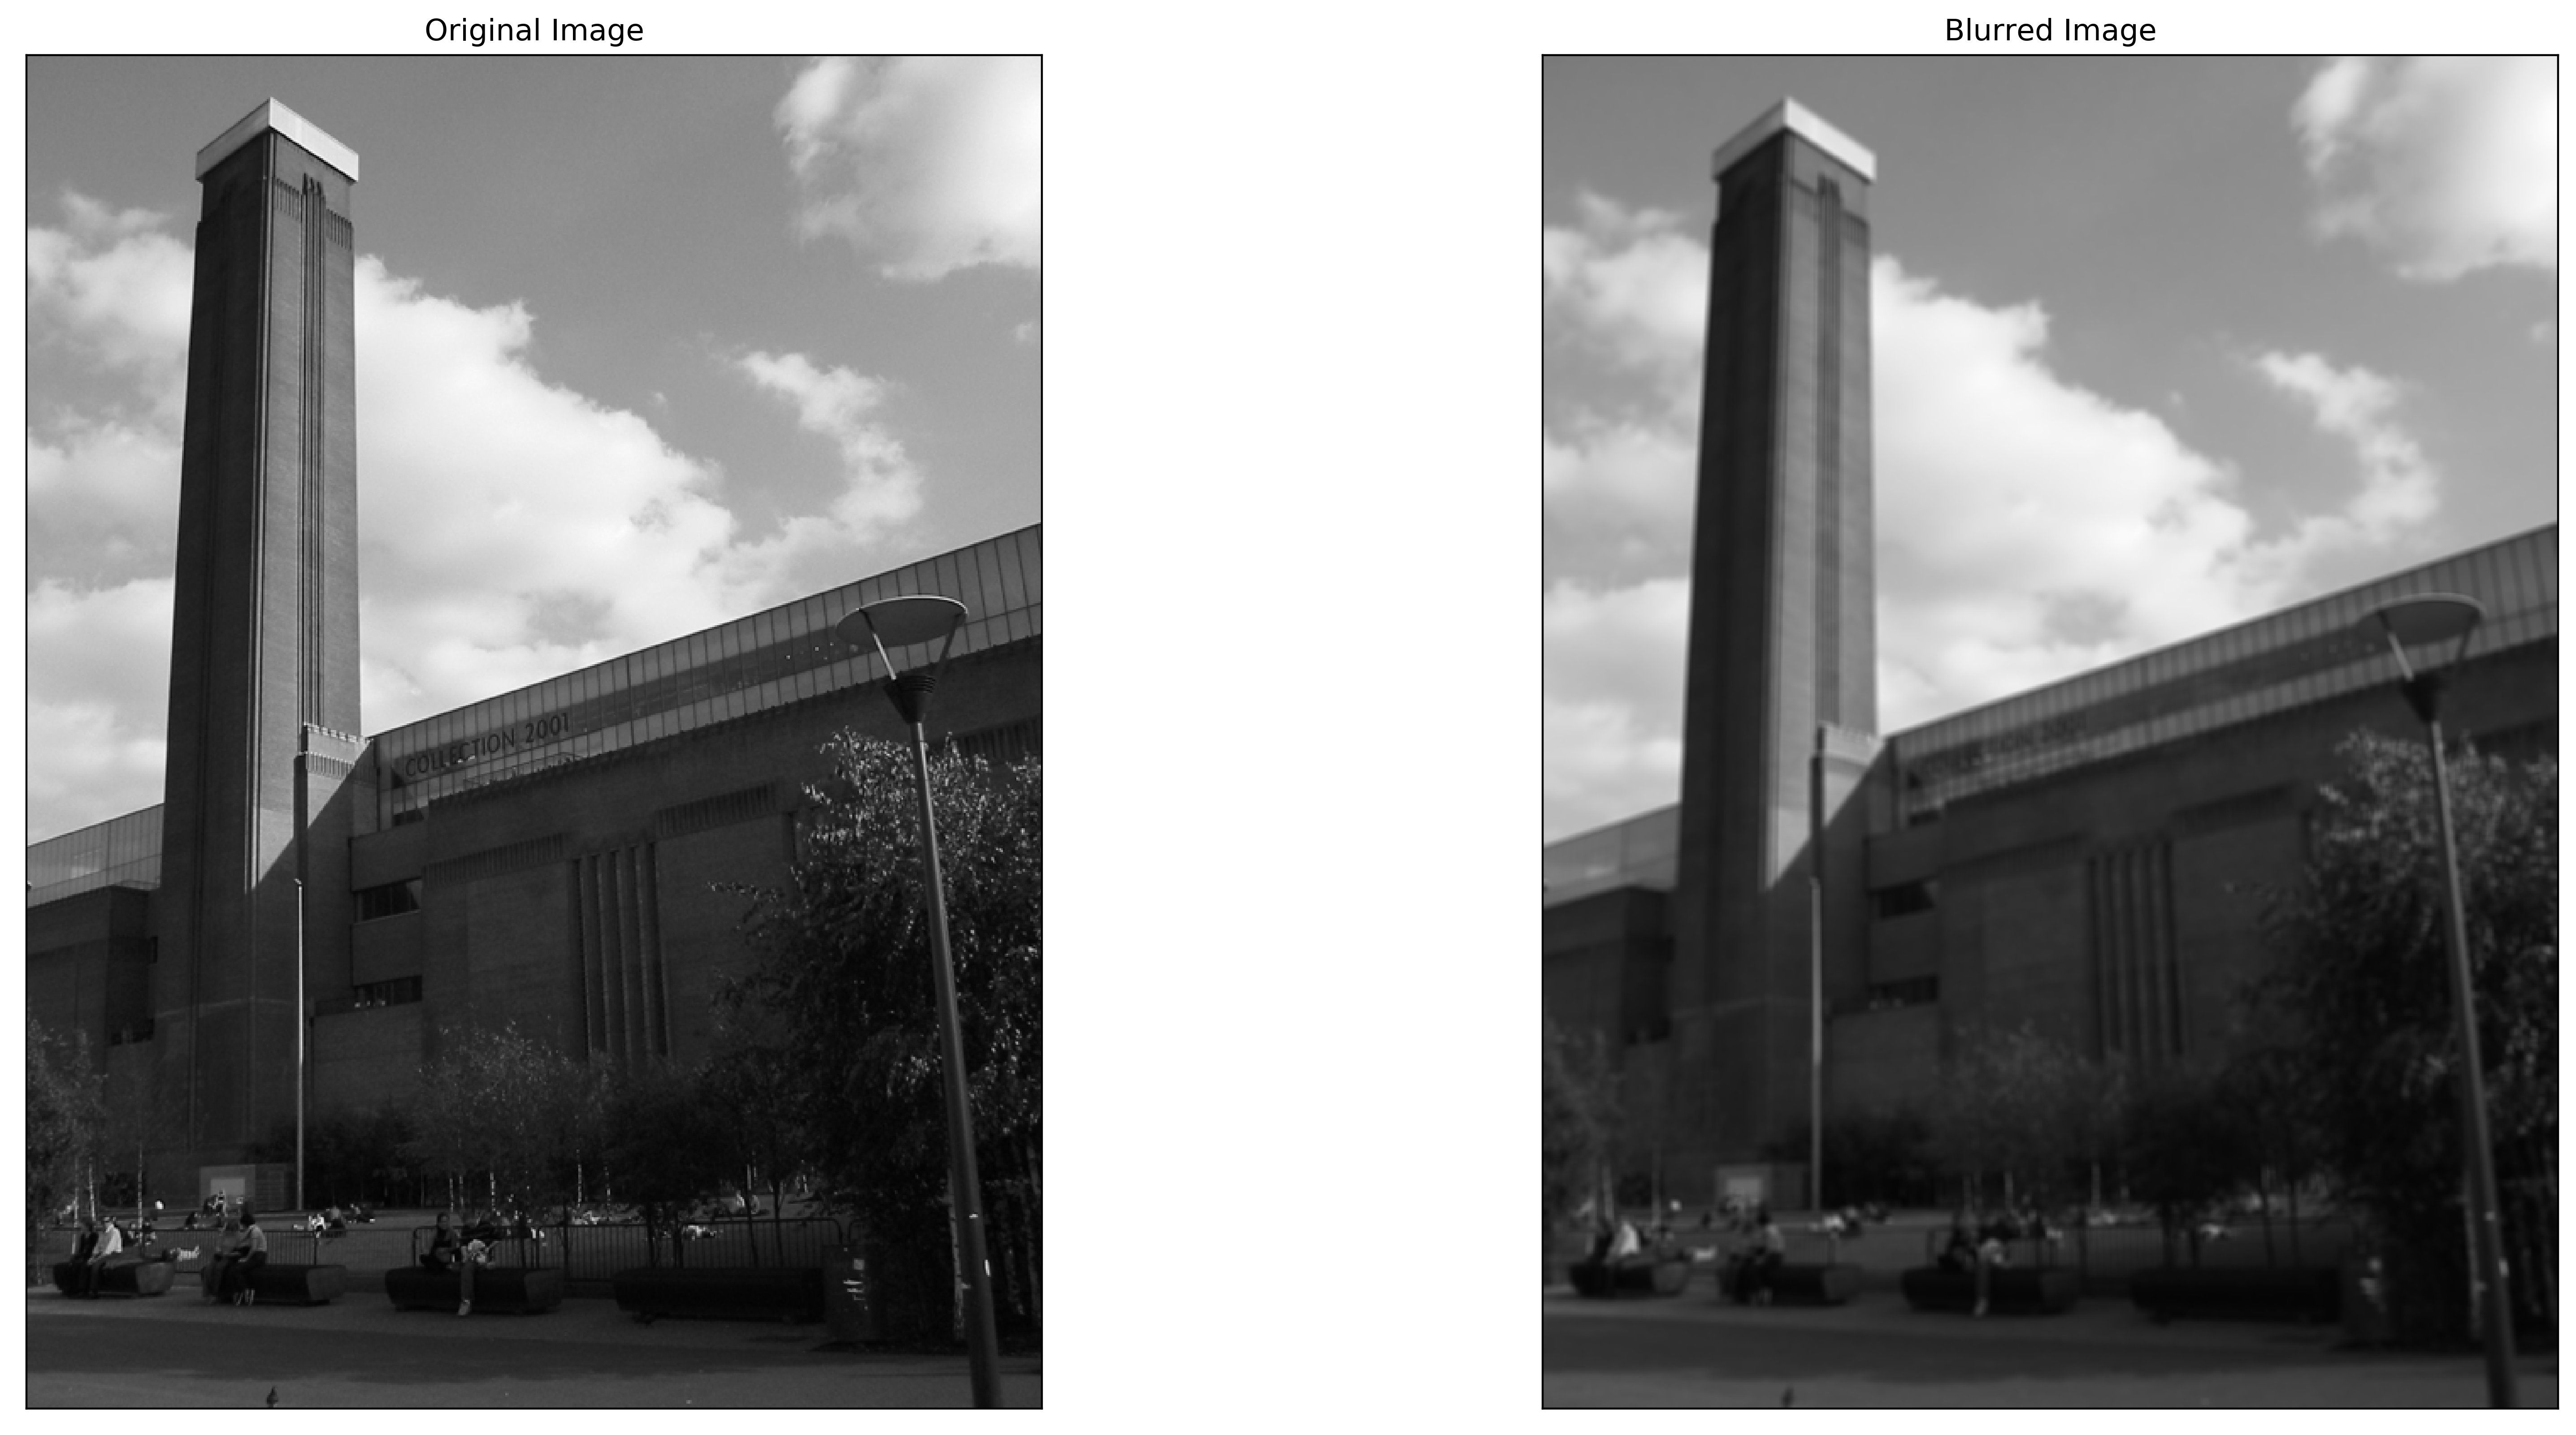

In [4]:
image_gaussianBlur = cv2.GaussianBlur(image, (5,5), 3,3)

plt.figure(figsize=(20, 10))
plt.subplot(121),plt.imshow(image,cmap = 'gray'), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_gaussianBlur,cmap = 'gray'), plt.title('Blurred Image'), plt.xticks([]), plt.yticks([])
plt.show()


### cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) → dst¶
* src – input image.
* dst – output image of the same size and the same number of channels as src .
* ddepth – output image depth; the following combinations of src.depth() and ddepth are supported:
 * src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F
 * src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F
 * src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F
 * src.depth() = CV_64F, ddepth = -1/CV_64F
   when ddepth=-1, the destination image will have the same depth as the source; in the case of 8-bit input images it will result in truncated derivatives.
* xorder – order of the derivative x.
* yorder – order of the derivative y.
* ksize – size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
* scale – optional scale factor for the computed derivative values; by default, no scaling is applied (see getDerivKernels() for details).
* delta – optional delta value that is added to the results prior to storing them in dst.
* borderType – pixel extrapolation method (see borderInterpolate() for details).



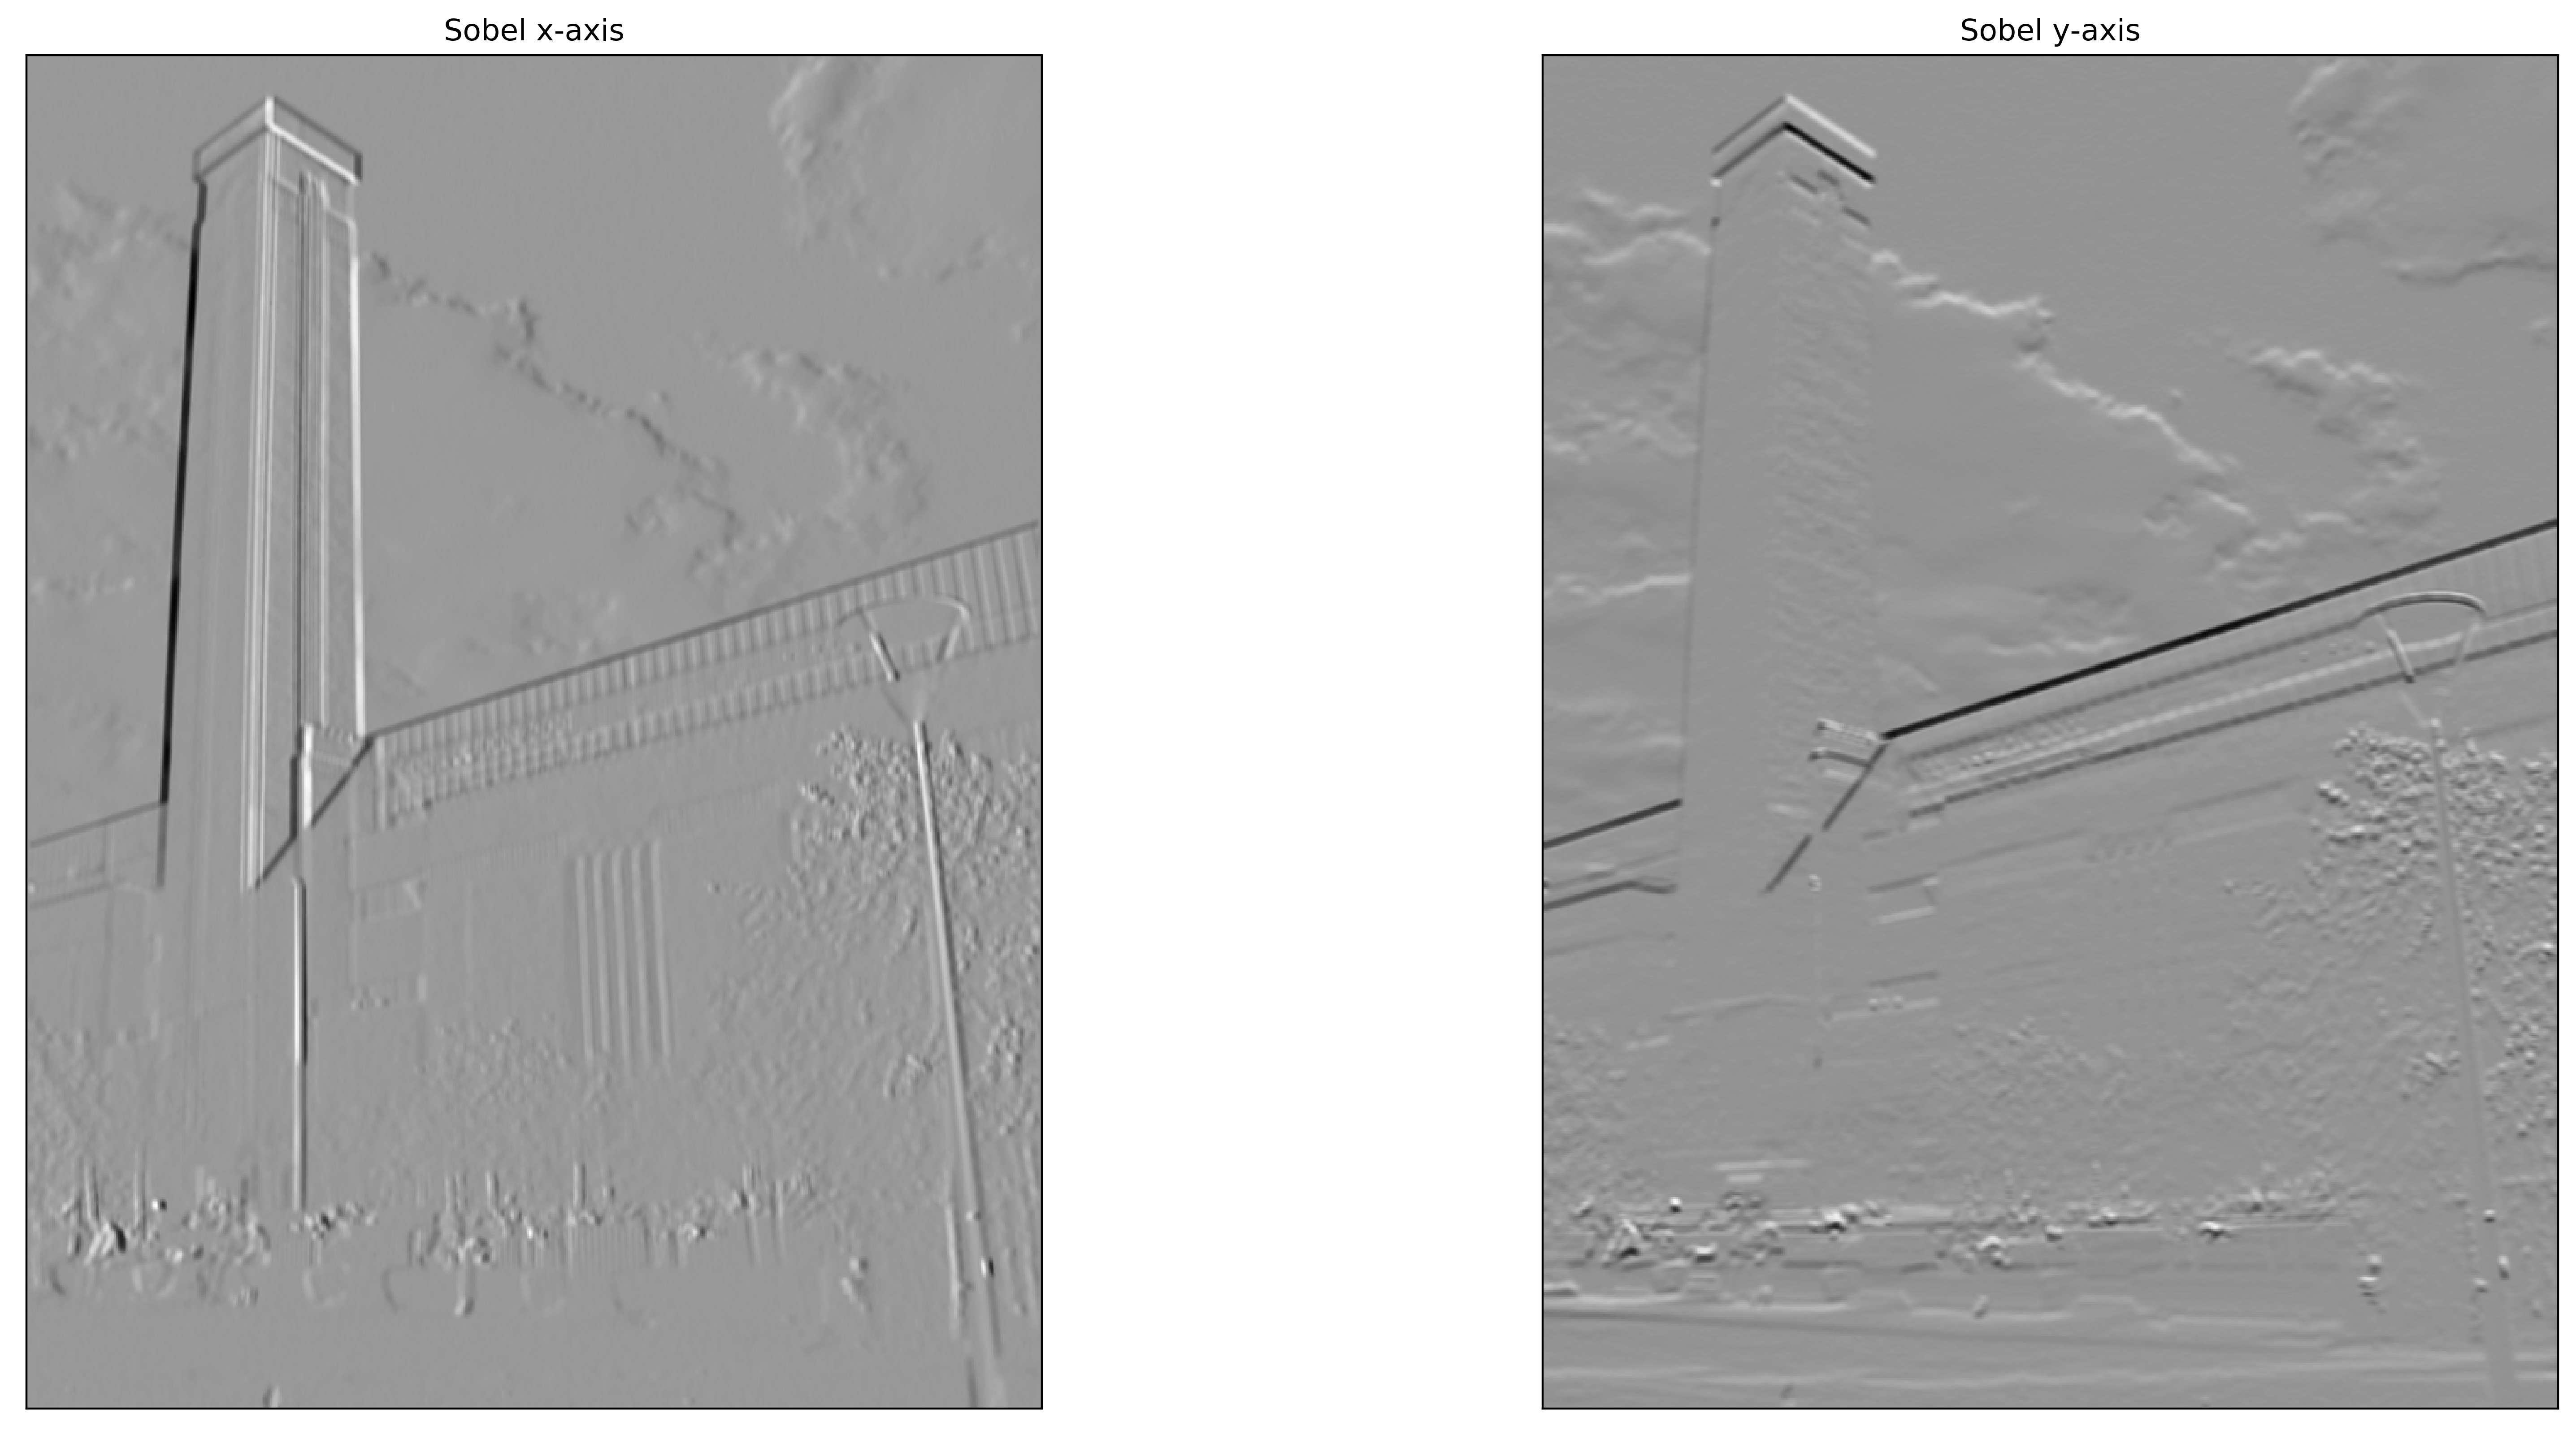

In [5]:
image_gaussianBlur_gray = cv2.cvtColor(image_gaussianBlur, cv2.COLOR_BGR2GRAY)
image_sobelx = cv2.Sobel(image_gaussianBlur_gray,cv2.CV_16S,1,0,ksize=3)
image_sobely = cv2.Sobel(image_gaussianBlur_gray,cv2.CV_16S,0,1,ksize=3)

plt.figure(figsize=(20, 10))
plt.subplot(121),plt.imshow(image_sobelx,cmap = 'gray'), plt.title('Sobel x-axis'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_sobely,cmap = 'gray'), plt.title('Sobel y-axis'), plt.xticks([]), plt.yticks([])
plt.show()

Stellen Sie dar Resultat der Ableitungen dar (wie?) und berechnen Sie auch die Kantenstärke als 

$$ \text{edge} = \sqrt{dx^2 + dy^2} $$

und stellen Sie diese dar.


368.0461927530293


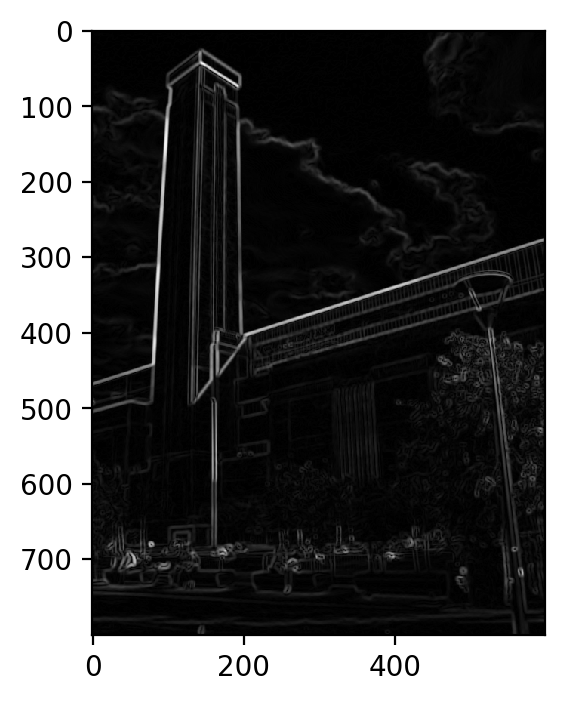

In [17]:
#edges = np.sqrt(np.add(np.square(image_sobelx), np.square(image_sobely)))
#plt.subplot(231), plt.imshow(edges,cmap = 'gray'), plt.xticks([]), plt.yticks([])


dx2 = image_sobelx.astype(np.float) * image_sobelx.astype(np.float)
dy2 = image_sobely.astype(np.float) * image_sobely.astype(np.float)
edge = np.sqrt(dx2 + dy2)
print(np.max(edge))
plt.imshow(edge / np.max(edge), cmap="gray")
plt.show()


Wenden Sie nun nochmals Canny an, aber geben Sie dabei die bereits definierten Ableitungen mit.

Experimentieren Sie mit verschiedenen Werten für das Sigma beim GaussianBlur. Wie wirkt sich der Parameter auf die Kanten aus?

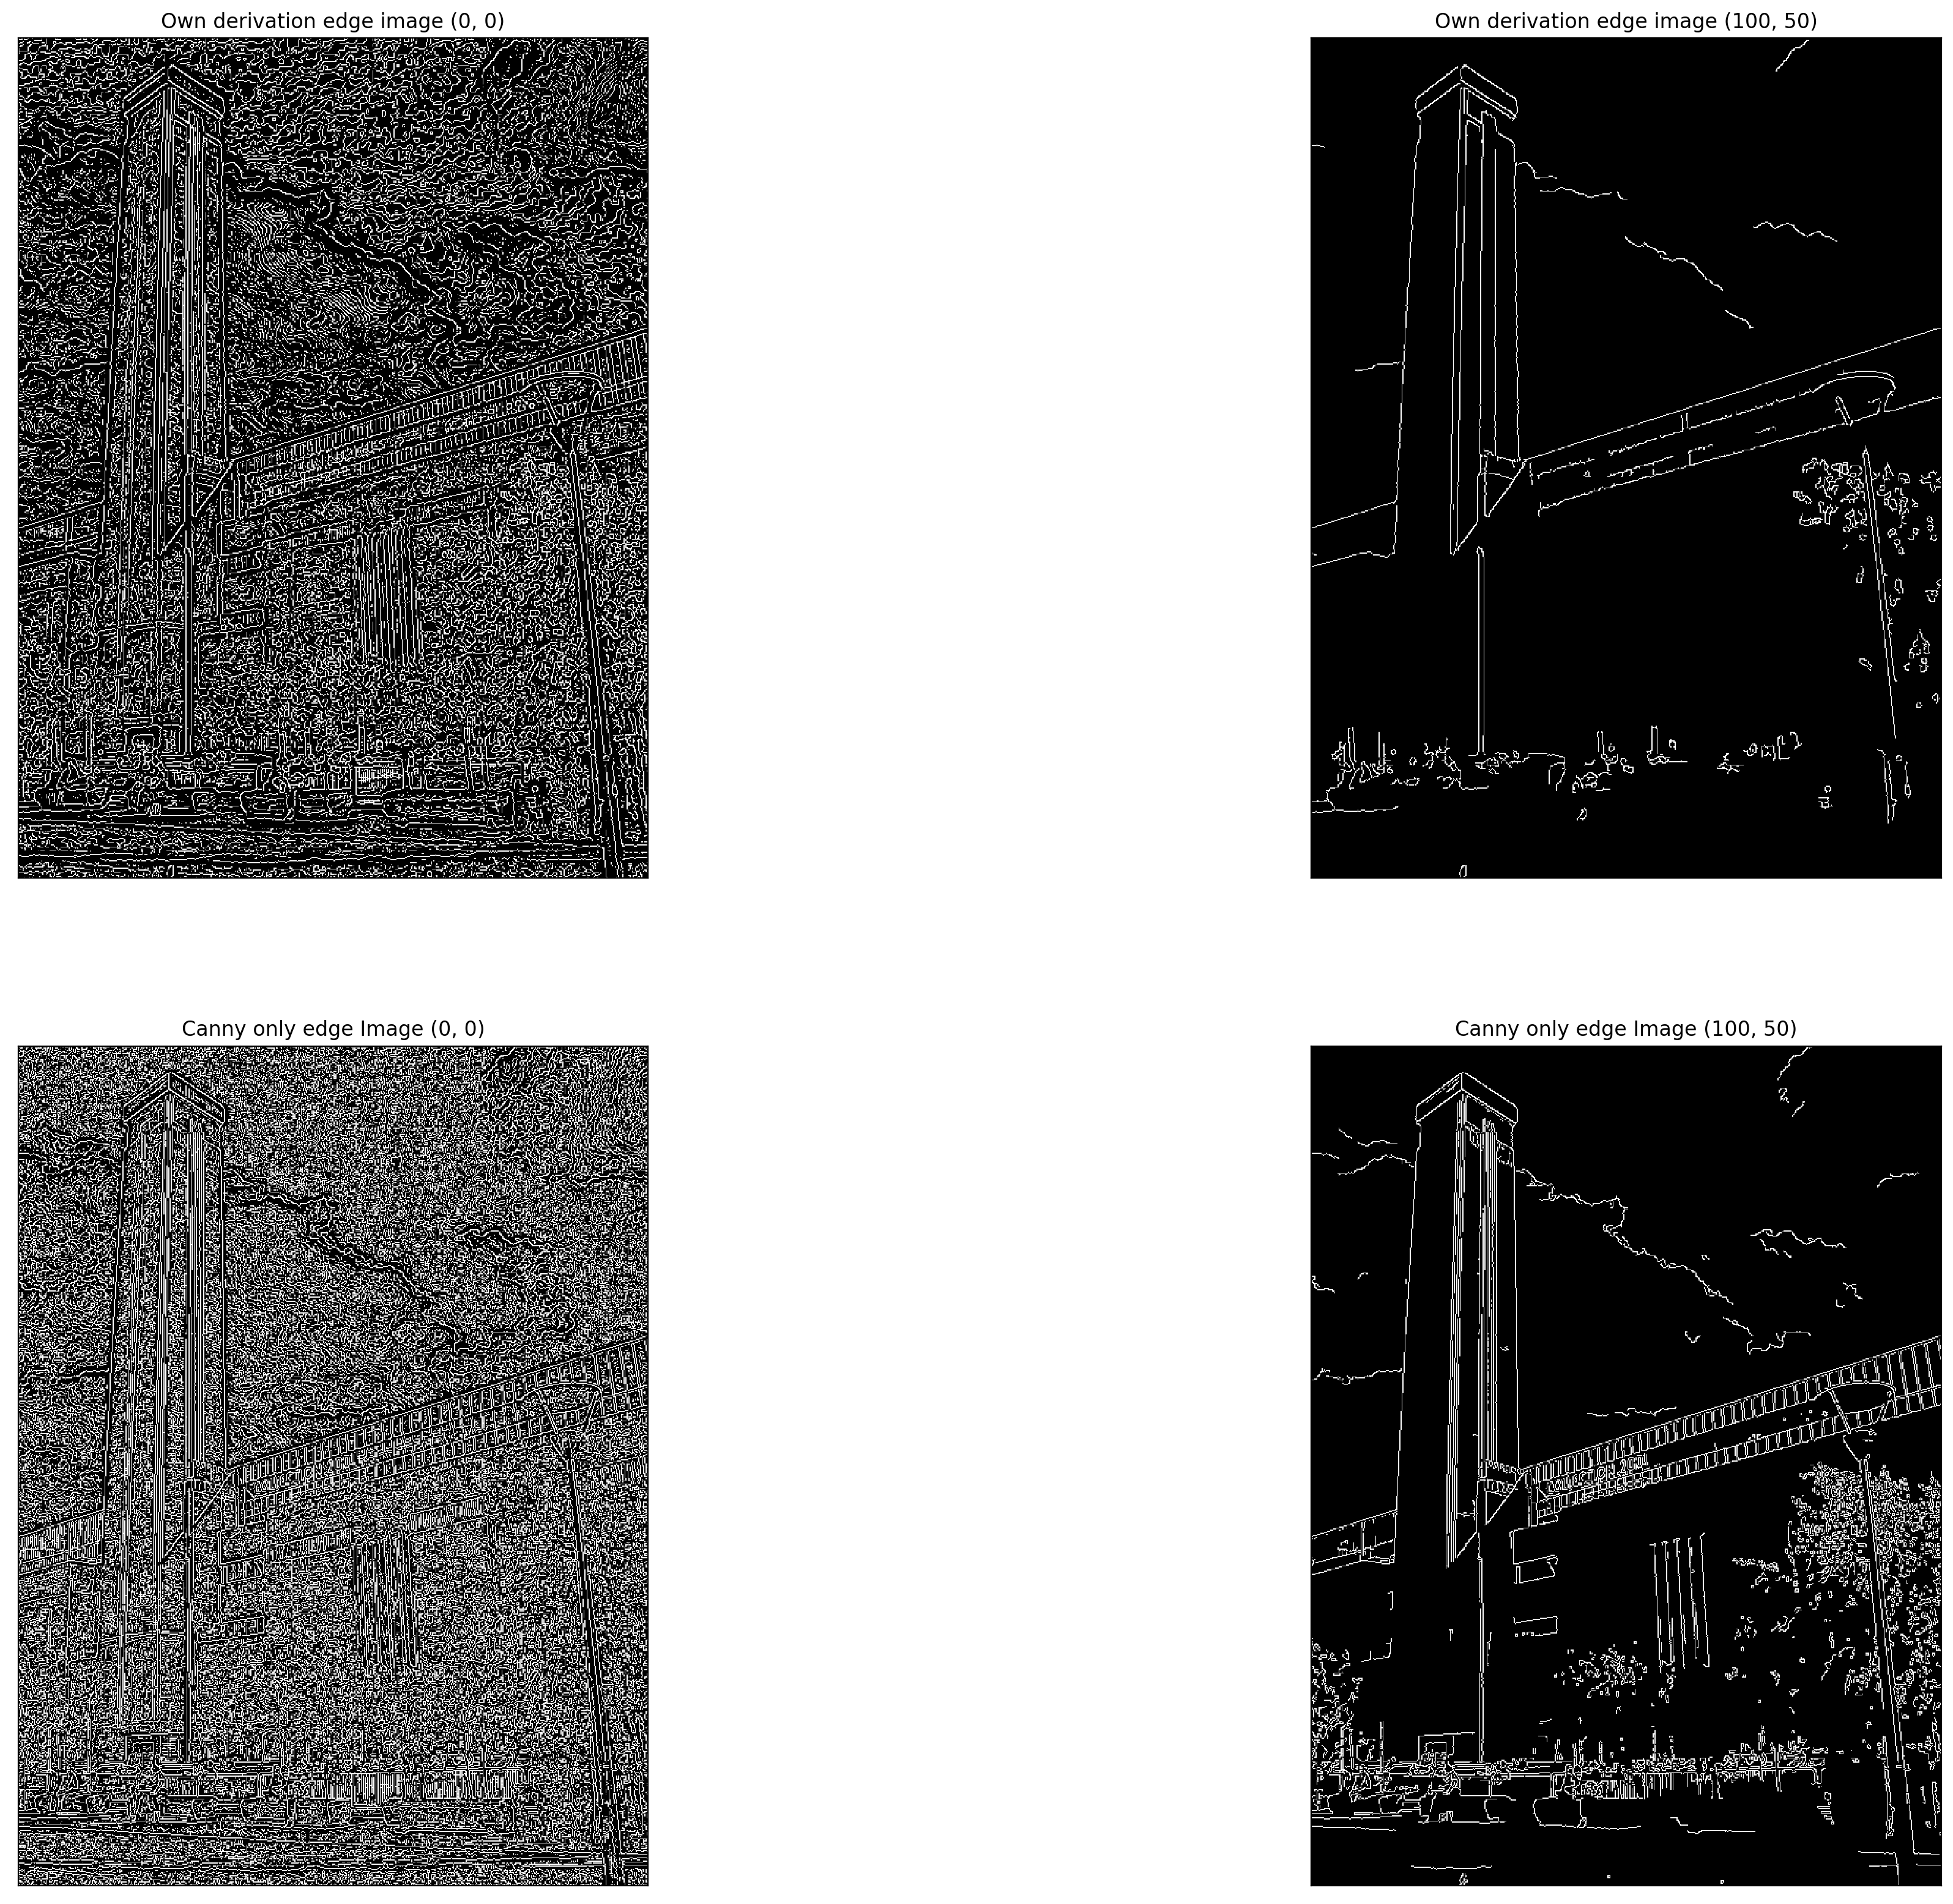

In [18]:
edges_canny_00 = cv2.Canny(image_sobelx, image_sobely, 0,0)
edges_canny_10050 = cv2.Canny(image_sobelx, image_sobely, 100,50)


plt.figure(figsize=(25, 20))
plt.subplot(221),plt.imshow(edges_canny_00,cmap = 'gray'), plt.title('Own derivation edge image (0, 0)'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(edges_canny_10050,cmap = 'gray'), plt.title('Own derivation edge image (100, 50)'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(edges_00,cmap = 'gray'), plt.title('Canny only edge Image (0, 0)'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(edges_10050,cmap = 'gray'), plt.title('Canny only edge Image (100, 50)'), plt.xticks([]), plt.yticks([])
plt.show()


## Anmerkungen
* Im den linken Bildern ist vor allem die Wirkung des GaussianBlur zu sehen. Jedoch waren nur kleine Veränderungen zu sehen, als das Sigma geändert wurde. 
* Bei den Bildern rechts sind die Unterschiede gut zu erkennen. Bei der Erarbeitung hat sich sofort gezeigt, dass die kSize des Sobel Operators einen sehr grossen Einfluss hat. Wird in diesem Beispiel kSize = 7 gewählt, dann sind die Resultate schlechter als beim direkten Anwenden des Canny Operator. Für die kSize wurde nun 3 gewählt.

## Hough Transformation

Die Hough Transformation wird verwendet um Geraden in einem Bild zu erkennen.

Dafür stehen verschiedene Implementationen zur Verfügung, diejenige in OpenCV ist als cv2.HoughLines verfügbar und berechnet direkt die gefundenen Linien. Diejenige in skimage.transform braucht 2 Schritte mit den Funktionen 'hough_lines' um zuerst den Akkumulator zu berechnen und 'hough_lines_peaks' um die Maxima zu finden. Dafür lässt sich damit der Akkumulator darstellen

Verwenden Sie HoughLines um im Kantenbild die Geraden zu finden und stellen Sie das Ergebnis und den Akkumulator da.

298


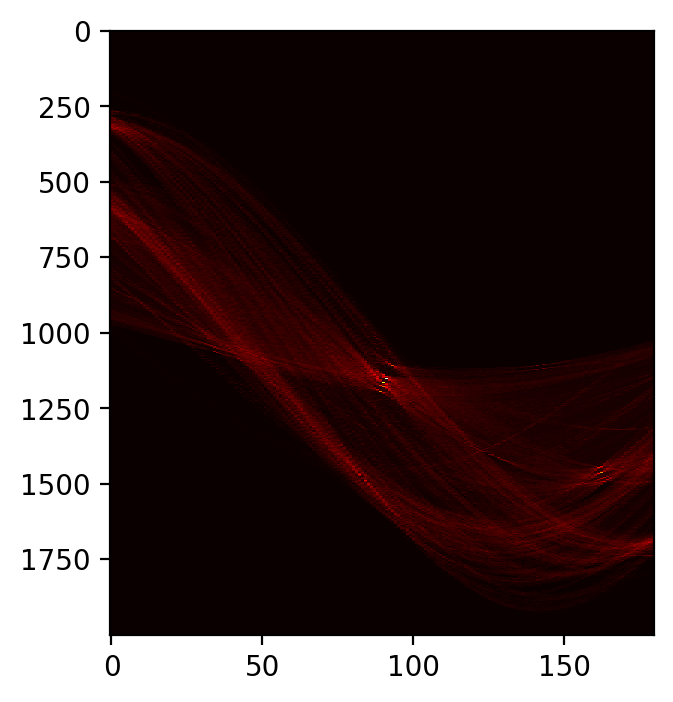

In [19]:
from skimage.transform import hough_line, hough_line_peaks
hspace, theta, distances = hough_line(edges_canny_10050)
print(np.max(hspace))
plt.imshow(hspace, cmap="hot", aspect=0.1)
plt.show()

Text(0.5, 1.0, 'Detected lines')

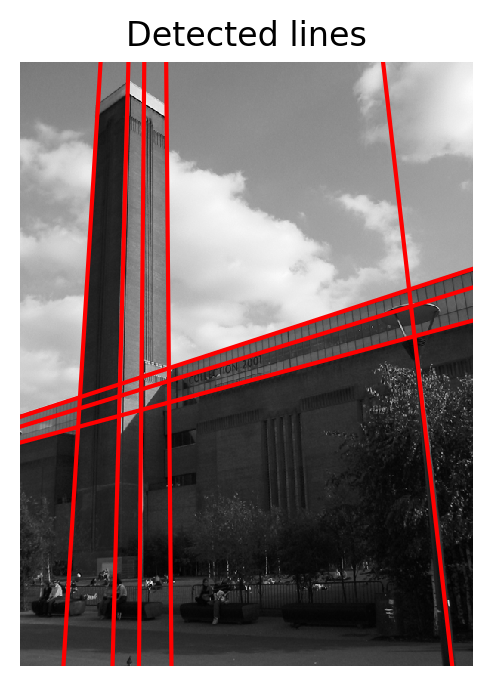

In [20]:
accum, angles, dist_peaks = hough_line_peaks(hspace, theta, distances, threshold=90)
mpl.rcParams['figure.dpi']=200
plt.imshow(image)
ax = plt.gca()
for angle, dist in zip(angles, dist_peaks):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax.plot((0, image.shape[1]), (y0, y1), '-r')
ax.set_xlim((0, image.shape[1]))
ax.set_ylim((image.shape[0], 0))
ax.set_axis_off()
ax.set_title('Detected lines')

## Weiteres Beispiel

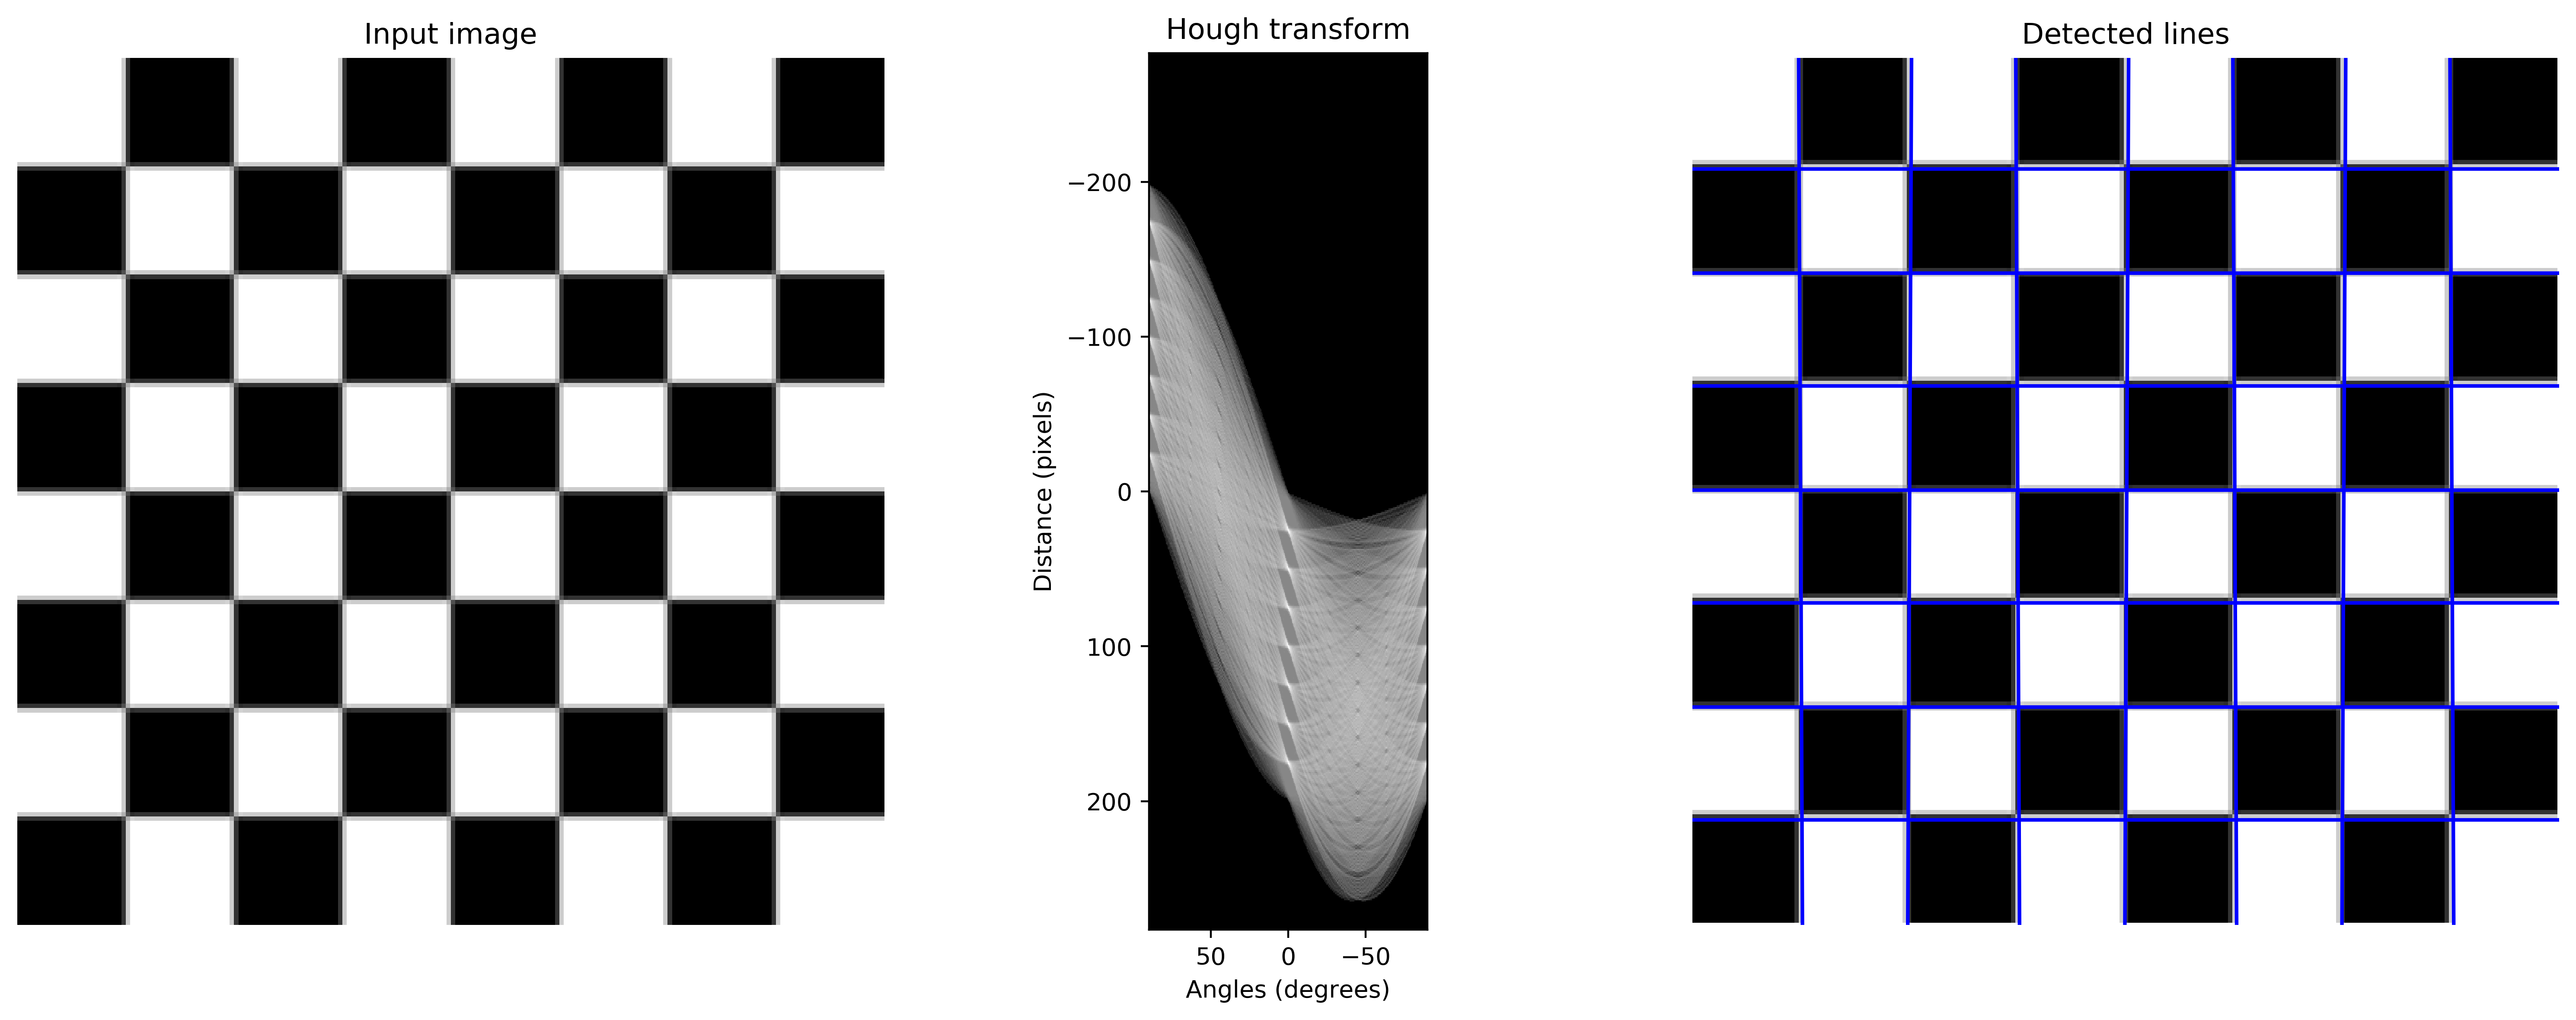

In [248]:
from skimage.transform import probabilistic_hough_line

image = data.checkerboard()
edges = canny(image, 2, 1, 25)
# Set a precision of 0.5 degree. - Classic straight-line Hough transform
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = hough_line(edges, theta=tested_angles)
# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()
ax[1].imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]], cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')
ax[2].imshow(image, cmap=cm.gray)
origin = np.array((0, image.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-b')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

Stellen Sie die gefundenen Geraden nun auf dem Bild dar. Ein Beispiel dazu finden Sie auf

http://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html#sphx-glr-auto-examples-edges-plot-line-hough-transform-py

Sie müssen dazu von den Polarkoordinaten auf kartesische Kooridnaten umrechnen und die zwei Endpunkte der Gerade bestimmen.